# **<center><b>Caso Cancer de Mama - K-means</b></center>**

##<h2><b>1. Preparacion del Modelo</b></h2>

### <center><h2><b>1.1. Importar Librerias</b></h2></center>

In [32]:
# Import Cancer de mama DataSet
from sklearn.datasets import load_breast_cancer

# Import sk-learn libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Import oher libraries
import numpy as np
import matplotlib.pyplot as plt
import joblib

### <h2><b>1.2. Cargar la data de Cancer de Mama</b></h2>

In [33]:
# Load Breast Cancer dataset
print("Loading dataset...")
dataset = load_breast_cancer()
X = dataset.data
y = dataset.target
print(f"Dataset loaded: {X.shape[0]} samples, {X.shape[1]} features")

Loading dataset...
Dataset loaded: 569 samples, 30 features


##<h2><b>2. Entrenamiento del modelo</b></h2>

### <h2><b>2.1. Escalamiento y Reducción de Dimensiones <b></h2>

In [34]:
# Data Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_pca = scaler.fit_transform(X)

# Reduce dimension with PCA Components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Aplicar PCA (opcional, pero se puede usar para visualización)
pca_scaled = PCA(n_components=2)
X_pca_scaled = pca.fit_transform(X_scaled_pca)

### <h2><b>2.3. Realización de Predicciones</b></h2>

In [35]:
# Apply k-means with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42, init="k-means++")
clusters = kmeans.fit_predict(X_scaled) # sin las etiquetas

# Método del codo: calcular inercia para distintos valores de k
inercia_valores = []
k_rango = range(1, 11)

for k in k_rango:
    modelo = KMeans(n_clusters=k, random_state=42, init="k-means++")
    modelo.fit(X_scaled_pca)
    inercia_valores.append(modelo.inertia_)

print("Model trained")

Model trained


## <h2><b>3. Evaluación de Métricas</b></h2>

In [36]:
# Make predictions
metrics = {
    "silhouette": silhouette_score(X_scaled, clusters),
    "calinski": calinski_harabasz_score(X_scaled, clusters),
    "davies": davies_bouldin_score(X_scaled, clusters),
    "inercia": kmeans.inertia_
}

print("Model Metrics:")
for name, value in metrics.items():
    print(f"{name}: {value:.4f}")

Model Metrics:
silhouette: 0.3447
calinski: 267.6804
davies: 1.3093
inercia: 11595.6833


## <h2><b>4. Numero de Elemantos por Cluster</b></h2>

In [37]:
# Show number of elements per cluster
conteo_clusters = np.bincount(clusters)
for i, count in enumerate(conteo_clusters):
    print(f"Clúster {i}: {count} muestras")

Clúster 0: 188 muestras
Clúster 1: 381 muestras


## <h2><b>5. Visualizaciones</b></h2>

### <h2><b>5.1 Gráfica Scatter Plot (Clusters vs Centroids)</b></h2>

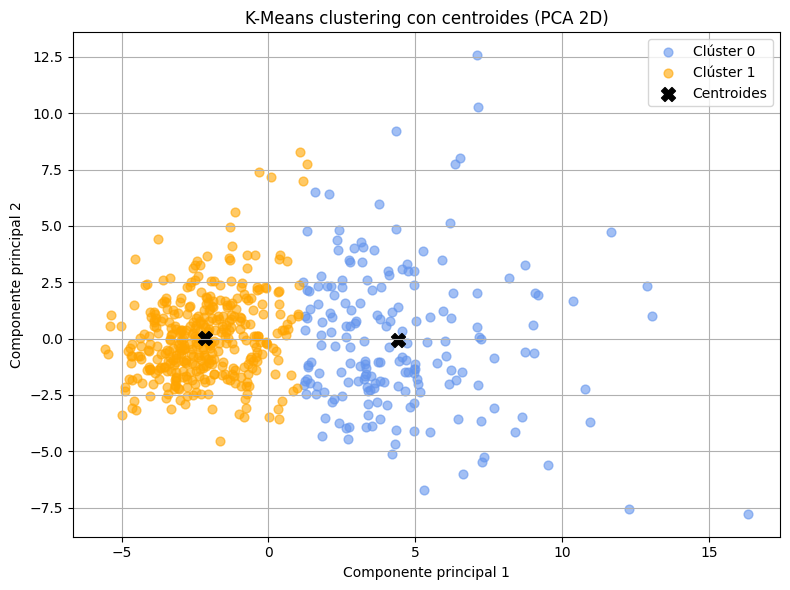

In [38]:
# Visualize clusters and centroids in 2D PCA
centroides = kmeans.cluster_centers_
centroides_pca = pca.transform(centroides)

plt.figure(figsize=(8, 6))
# Cluster 0
plt.scatter(X_pca[clusters == 0, 0], X_pca[clusters == 0, 1],
            c='cornflowerblue', label='Clúster 0', alpha=0.6, s=40)
# Cluster 1
plt.scatter(X_pca[clusters == 1, 0], X_pca[clusters == 1, 1],
            c='orange', label='Clúster 1', alpha=0.6, s=40)
# Centroides
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1], c='black', s=100, marker='X', label='Centroides')
plt.title('K-Means clustering con centroides (PCA 2D)')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### <h2><b>5.2 Gráfico de Líneas (Método del Codo)</b></h2>

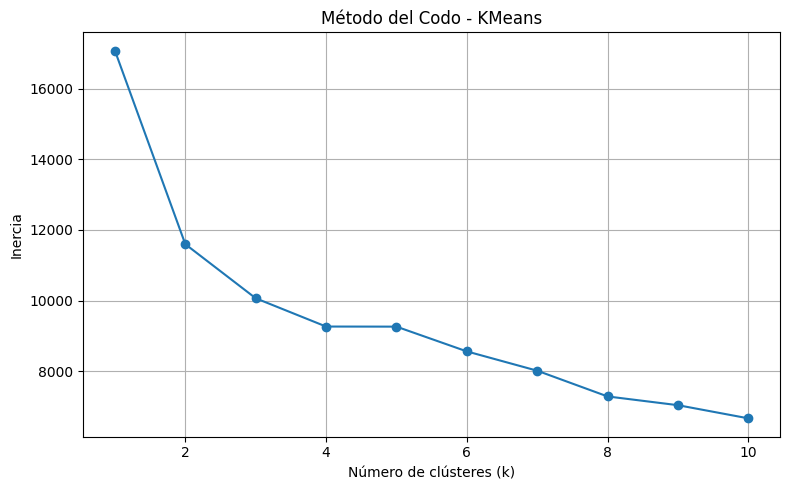

In [39]:
# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_rango, inercia_valores, marker='o')
plt.title("Método del Codo - KMeans")
plt.xlabel("Número de clústeres (k)")
plt.ylabel("Inercia")
plt.grid(True)
plt.tight_layout()
plt.show()

## <h2><b>6. Guardado del modelo</b></h2>

In [40]:
# Saving Models
joblib.dump(kmeans, "kmeans_cancer.pkl")
joblib.dump(scaler, "escalador.pkl")
joblib.dump(pca, "pca_2_componentes.pkl")

['pca_2_componentes.pkl']

## <h2><b>7. Validación del modelo</b></h2>

In [41]:
# Simulate predictions with new data
nuevo_dato = X[0].reshape(1, -1)  # Tomamos un ejemplo del dataset original
nuevo_escalado = scaler.transform(nuevo_dato)
nuevo_cluster = kmeans.predict(nuevo_escalado)
print(f"\nEl nuevo caso fue asignado al clúster: {nuevo_cluster[0]}")


El nuevo caso fue asignado al clúster: 0
